In [1]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', None) 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , RepeatedStratifiedKFold,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
#from sklearn.cross_validation import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [2]:
df_no_scale = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/temp_csv/hot_code_NO_scale.csv')

del df_no_scale['Health_Camp_ID']
del df_no_scale['Category1_x']
del df_no_scale['Category2']
del df_no_scale['Category3']
del df_no_scale['City_Type']
del df_no_scale['Job_Type']
del df_no_scale['online_score']

In [3]:
df_no_scale 

,Var1,Var2,Var3,Var4,Var5,y_target,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,Second,Third,A,C,D,E,F,G,2100,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,9999.0,1,2,3,4,1036,1216,1217,1352,1704,1729,2517,2662,23384
0,4.0,0.0,0.0,0.0,2.0,1.0,-25.0,278,253,34,59,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,-24.0,99,75,161,185,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.0,0.0,0.0,0.0,2.0,0.0,-60.0,355,295,711,771,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,4.0,12,16,19,15,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,69.0,146,215,82,13,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,0.0,0.0,0.0,0.0,0.0,0.0,-204.0,16,-188,188,392,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
75274,0.0,0.0,0.0,0.0,0.0,1.0,-73.0,31,-42,1,74,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
75275,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10,12,6,4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
75276,0.0,0.0,0.0,0.0,0.0,0.0,27.0,13,40,31,4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
y = df_no_scale.pop('y_target')
X= df_no_scale 

X_trainD, X_testD, y_trainD, y_testD = train_test_split(X, y, test_size=0.3, random_state=101) 
     
data_dmatrix_train = xgb.DMatrix(data=X_trainD,label=y_trainD) # not sure what these are doing ?! 
data_dmatrix_test = xgb.DMatrix(data=X_testD,label=y_testD) 

model = XGBClassifier(scale_pos_weight=4)

weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
scores = cross_val_score(model,X_testD,y_testD , scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
grid_result = grid.fit(X_trainD, y_trainD)

KeyboardInterrupt: 

In [23]:
xg_reg1_predict = grid.predict(X_testD)  
xg_reg1_proba = grid.predict_proba(X_testD )[:,1]
 
preds_xg1_thresh1 =xg_reg1_proba>=0.5
preds2_xg1_thresh2 = xg_reg1_proba>=0.35
preds2_xg1_thresh3 = xg_reg1_proba>=0.6

mat1 = confusion_matrix(y_testD ,preds_xg1_thresh1 ) 
mat2 = confusion_matrix(y_testD ,preds2_xg1_thresh2 ) 
mat3 = confusion_matrix(y_testD ,preds2_xg1_thresh3) 

array([0.84898795, 0.85620975, 0.85531399, 0.85607158, 0.8509412 ,
       0.85993416, 0.85708376, 0.85776578, 0.85749216, 0.8606809 ,
       0.85410148, 0.84475781, 0.86116323, 0.8554169 , 0.85160698,
       0.85963141, 0.8591227 , 0.8588606 , 0.85191814, 0.86220478,
       0.85197805, 0.8581091 , 0.85090077, 0.84783943, 0.84955848,
       0.85725013, 0.85290963, 0.85717344, 0.8676544 , 0.86298672])
       #only scale_pos_weight in model = XDG()
       
_____
array([0.83886739, 0.84530407, 0.84200486, 0.84599838, 0.83854046,
       0.85544673, 0.84660266, 0.84697707, 0.84457941, 0.84872917,
       0.84385022, 0.83222779, 0.85165164, 0.84207588, 0.84183974,
       0.84991208, 0.85087652, 0.84554578, 0.84094789, 0.8546129 ,
       0.83849397, 0.8491914 , 0.84094306, 0.83905131, 0.83879762,
       0.84573519, 0.84212412, 0.84789098, 0.85671974, 0.85060502])
       #this one with added things does not as well
       
       
       _____
   array([0.84900374, 0.85768961, 0.85584261, 0.85813449, 0.85107634,
   0.86237029, 0.86072254, 0.85835069, 0.8561842 , 0.8622333 ,
   0.85389834, 0.84670585, 0.86064632, 0.85627997, 0.85308067,
   0.85883347, 0.85905758, 0.85564802, 0.85214198, 0.86087475,
   0.85324544, 0.85972904, 0.84984088, 0.84607851, 0.85023209,
   0.8568009 , 0. 
   # model = XGBClassifier(scale_pos_weight=4)

weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
grid_result = grid.fit(X, y)

In [7]:
scores

array([0.82989332, 0.81788308, 0.84043728, 0.84858586, 0.82630878,
       0.8377693 , 0.85190921, 0.83121772, 0.83635141, 0.8280352 ,
       0.831311  , 0.83381342, 0.83146667, 0.84260234, 0.82696048,
       0.835495  , 0.82128938, 0.84542233, 0.83557801, 0.82527624,
       0.8432083 , 0.82880858, 0.82055197, 0.82848694, 0.83805408,
       0.85069503, 0.8413765 , 0.83280431, 0.83506798, 0.82715126])

In [14]:
mat1

array([[14979,  1387],
       [ 2739,  3479]])

In [24]:
mat3

array([[15318,  1048],
       [ 3146,  3072]])

In [25]:
print(grid_result.best_score_, grid_result.best_params_)

0.8552576088526203 {'scale_pos_weight': 1}


In [26]:
print(grid_result.predict_proba(X_testD))

[[0.89319956 0.10680041]
 [0.9794165  0.02058354]
 [0.85299623 0.14700377]
 ...
 [0.91754115 0.08245888]
 [0.1743955  0.8256045 ]
 [0.17840213 0.8215979 ]]


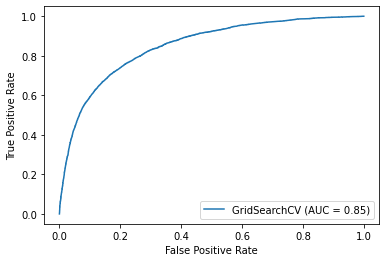

In [27]:
plot_roc_curve(grid, X_testD , y_testD )
plt.show()